In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import datetime

In [2]:
df = pd.read_csv('SUNPHARMA.csv')

df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     528
%Deliverble            528
dtype: int64

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df=df[df['Date']>'2019-01-01']

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4730,2019-01-02,SUNPHARMA,EQ,433.55,430.50,441.2,429.25,439.95,440.05,435.70,9656878,4.207479e+14,100434.0,3755920.0,0.3889
4731,2019-01-03,SUNPHARMA,EQ,440.05,442.05,443.6,434.00,434.90,436.10,439.97,9479511,4.170669e+14,112961.0,2912917.0,0.3073
4732,2019-01-04,SUNPHARMA,EQ,436.10,439.10,439.9,432.20,433.40,433.80,435.62,6228693,2.713361e+14,81360.0,1392009.0,0.2235
4733,2019-01-07,SUNPHARMA,EQ,433.80,437.10,438.0,429.30,430.85,430.80,433.19,4118235,1.783964e+14,64152.0,1444774.0,0.3508
4734,2019-01-08,SUNPHARMA,EQ,430.80,433.80,449.0,432.35,448.75,448.05,443.03,12368631,5.479690e+14,153466.0,3819410.0,0.3088


In [6]:
X = df[['Prev Close','Date','High','Low','Open']].values
y = df[['Close']].values

In [7]:
X = X.reshape(-1,5)

In [8]:
y

array([[440.05],
       [436.1 ],
       [433.8 ],
       [430.8 ],
       [448.05],
       [448.75],
       [444.6 ],
       [444.4 ],
       [450.85],
       [452.45],
       [453.8 ],
       [426.55],
       [390.75],
       [398.3 ],
       [418.95],
       [431.  ],
       [423.  ],
       [422.4 ],
       [411.75],
       [422.4 ],
       [417.95],
       [423.45],
       [423.25],
       [414.8 ],
       [409.9 ],
       [416.6 ],
       [434.9 ],
       [431.05],
       [428.55],
       [436.6 ],
       [431.25],
       [440.9 ],
       [422.9 ],
       [414.65],
       [413.65],
       [422.35],
       [429.7 ],
       [430.5 ],
       [436.1 ],
       [435.75],
       [442.7 ],
       [445.15],
       [447.35],
       [455.9 ],
       [460.55],
       [450.9 ],
       [454.95],
       [459.45],
       [470.3 ],
       [456.5 ],
       [466.15],
       [464.35],
       [465.65],
       [468.95],
       [474.75],
       [473.25],
       [464.65],
       [469.8 ],
       [464.85

In [9]:
X_dftemp = pd.DataFrame(X,columns=[['Prev Close','Date','High','Low','Open']])

In [10]:
y.shape

(576, 1)

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [12]:
X = sc_X.fit_transform(X_dftemp[['Prev Close','High','Low','Open']])
y = sc_y.fit_transform(y)

In [13]:
y

array([[-4.78741267e-01],
       [-5.33622993e-01],
       [-5.65579441e-01],
       [-6.07261765e-01],
       [-3.67588404e-01],
       [-3.57862528e-01],
       [-4.15523076e-01],
       [-4.18301898e-01],
       [-3.28684902e-01],
       [-3.06454329e-01],
       [-2.87697284e-01],
       [-6.66311723e-01],
       [-1.16372079e+00],
       [-1.05882027e+00],
       [-7.71906943e-01],
       [-6.04482943e-01],
       [-7.15635806e-01],
       [-7.23972271e-01],
       [-8.71944520e-01],
       [-7.23972271e-01],
       [-7.85801051e-01],
       [-7.09383458e-01],
       [-7.12162279e-01],
       [-8.29567491e-01],
       [-8.97648620e-01],
       [-8.04558097e-01],
       [-5.50295923e-01],
       [-6.03788238e-01],
       [-6.38523508e-01],
       [-5.26675939e-01],
       [-6.01009416e-01],
       [-4.66931275e-01],
       [-7.17025217e-01],
       [-8.31651607e-01],
       [-8.45545715e-01],
       [-7.24666977e-01],
       [-6.22545284e-01],
       [-6.11429997e-01],
       [-5.3

In [14]:
Xscaleddf = pd.DataFrame(X,columns=[['Prev Close','High','Low','Open']])

In [15]:
Xfinal = pd.merge(Xscaleddf,X_dftemp['Date'],left_index=True,right_index=True)

In [16]:
Xfinal

,Prev Close,High,Low,Open,Date
0,-0.566656,-0.574249,-0.527922,-0.620527,2019-01-02
1,-0.475874,-0.541057,-0.461907,-0.460498,2019-01-03
2,-0.531041,-0.592227,-0.486923,-0.501371,2019-01-04
3,-0.563164,-0.618504,-0.527227,-0.529082,2019-01-07
4,-0.605063,-0.466376,-0.484838,-0.574805,2019-01-08
...,...,...,...,...,...
571,2.288066,2.230428,2.275963,2.337591,2021-04-26
572,2.242676,2.208992,2.289860,2.181025,2021-04-27
573,2.306222,2.276066,2.377417,2.295332,2021-04-28
574,2.364183,2.341066,2.416330,2.406175,2021-04-29


In [17]:
y.shape

(576, 1)

In [18]:
Xfinal.shape

(576, 5)

In [19]:
regressor = SVR(kernel='rbf')
regressor.fit(Xfinal[['Prev Close','High','Low','Open']],y)

/home/vivek/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [20]:
y_pred=regressor.predict(Xfinal[['Prev Close','High','Low','Open']])

In [21]:
y_pred.shape

(576,)

In [22]:
y_pred = y_pred.reshape(-1,1)
y_pred.shape

(576, 1)

In [23]:
X_plot = Xfinal.iloc[:,-1:]
X_plotdf = pd.DataFrame(X_plot,columns = [('Date',)])

In [24]:
X_plotdf.shape

(576, 1)

In [25]:
y_predscaled = sc_y.inverse_transform(y_pred.reshape(-1,1))

In [26]:
print(y_predscaled)

[[436.80774425]
 [439.03672108]
 [436.56008764]
 [434.05079372]
 [441.80155934]
 [448.95505895]
 [445.37188195]
 [446.64940588]
 [448.73162023]
 [452.93671167]
 [453.19355286]
 [435.68942546]
 [397.94847979]
 [400.5664056 ]
 [419.2964001 ]
 [424.30652833]
 [427.1158334 ]
 [425.62318463]
 [417.63683305]
 [417.37516508]
 [422.10632017]
 [423.83432731]
 [424.07922199]
 [416.57589579]
 [413.81045488]
 [412.67435201]
 [435.17072092]
 [430.5810948 ]
 [427.30583333]
 [435.22069912]
 [436.88627569]
 [437.73433535]
 [426.77254823]
 [421.03038247]
 [419.02755325]
 [422.31722532]
 [428.92108323]
 [433.97123604]
 [434.17901515]
 [432.13103062]
 [445.1197623 ]
 [447.35297423]
 [449.02303264]
 [452.13648598]
 [457.91233764]
 [455.86418246]
 [453.83598182]
 [458.97870067]
 [468.17234424]
 [462.06100616]
 [463.69529805]
 [467.2967882 ]
 [464.7180184 ]
 [472.52322397]
 [472.35163144]
 [475.27017101]
 [466.36246433]
 [467.63071258]
 [468.2751452 ]
 [474.25960333]
 [478.98790449]
 [480.74604941]
 [474.75

In [27]:
y_predscaled.shape

(576, 1)

In [28]:
y_preddf = pd.DataFrame(y_predscaled,columns=[['Close']])

In [29]:
y_preddf.shape

(576, 1)

In [30]:
r2_score(y,y_pred)

0.9961363899685918

In [31]:
new_df = pd.merge(X_plotdf,y_preddf,left_index=True,right_index=True)

In [32]:
new_df.shape

(576, 2)

In [33]:
yoldscaled = sc_y.inverse_transform(y)

In [34]:
ydf = pd.DataFrame(yoldscaled,columns=[['Close']])

In [35]:
old_df = pd.merge(X_plotdf,ydf,left_index=True,right_index=True)

In [36]:
new_df = new_df.rename(columns = {('Date',):'Date'})
old_df = old_df.rename(columns = {('Date',):'Date'})
new_df = new_df.rename(columns={('Close'):'Predicted Price'})
old_df = old_df.rename(columns={('Close'):'Actual Price'})

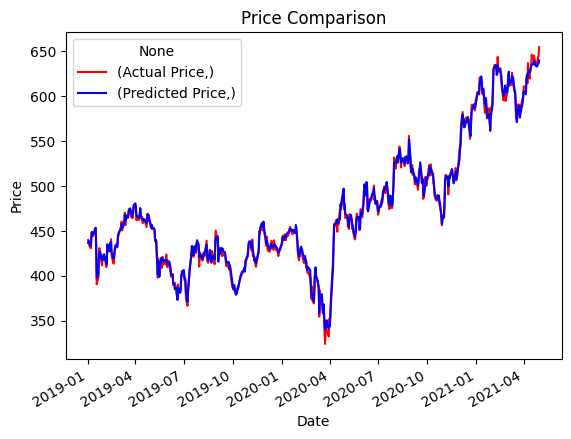

In [37]:
old_df.set_index(('Date',), inplace=True)
new_df.set_index(('Date',),inplace=True)
ax = old_df.plot(color='red')
new_df.plot(ax=ax,color='blue')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()